### 다중선형회귀
### 시간대비 성적데이터
### 좀 더 정확한 예측을 위해서는 추가정보 필요
### 공부시간외에 성적에 영향을 끼칠수 있는 다른 요인필요
### 과외시간을 추가함 => 항이 추가 => 기울기 하나 더 추가
### y = ax1 + bx2 + c

In [26]:
times = [2,4,6,8]
lession= [0,4,2,3]
sungjuk = [81,93,91,97]

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



In [28]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
xdata1 = [x[0] for x in data]
xdata2 = [x[1] for x in data]
ydata = [x[2] for x in data]

In [29]:
a = tf.Variable(tf.random.uniform([1], 0, 10,
                dtype=tf.float64, seed=1))
b = tf.Variable(tf.random.uniform([1], 0, 10,
                dtype=tf.float64, seed=1))
c = tf.Variable(tf.random.uniform([1], 0, 100,
                dtype=tf.float64, seed=1))

In [30]:
y = a * xdata1 + b * xdata2 + c

rmse = tf.sqrt(tf.reduce_mean(tf.square(y - ydata)))
learn_rate = 0.1

In [31]:
gradient_decent = tf.train.GradientDescentOptimizer\
                (learn_rate).minimize(rmse)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 10 == 0:
            print('훈련횟수 epoch %.f, RMSE %.3f,'\
            '기울기1 %.3f, 기울기2 %.3f, 절편 %.3f' %
                  ( step, sess.run(rmse),
                    sess.run(a), sess.run(b),
                    sess.run(c) ))

훈련횟수 epoch 0, RMSE 67.394,기울기1 8.582, 기울기2 8.871, 절편 91.136
훈련횟수 epoch 10, RMSE 31.201,기울기1 3.204, 기울기2 6.344, 절편 90.187
훈련횟수 epoch 20, RMSE 5.508,기울기1 -1.120, 기울기2 4.052, 절편 89.288
훈련횟수 epoch 30, RMSE 5.025,기울기1 -0.919, 기울기2 3.503, 절편 88.941
훈련횟수 epoch 40, RMSE 4.666,기울기1 -0.670, 기울기2 3.084, 절편 88.590
훈련횟수 epoch 50, RMSE 4.378,기울기1 -0.458, 기울기2 2.753, 절편 88.225
훈련횟수 epoch 60, RMSE 4.142,기울기1 -0.280, 기울기2 2.500, 절편 87.850
훈련횟수 epoch 70, RMSE 3.939,기울기1 -0.131, 기울기2 2.313, 절편 87.468
훈련횟수 epoch 80, RMSE 3.757,기울기1 -0.006, 기울기2 2.179, 절편 87.082
훈련횟수 epoch 90, RMSE 3.586,기울기1 0.102, 기울기2 2.087, 절편 86.693
훈련횟수 epoch 100, RMSE 3.421,기울기1 0.195, 기울기2 2.027, 절편 86.303
훈련횟수 epoch 110, RMSE 3.261,기울기1 0.277, 기울기2 1.991, 절편 85.912
훈련횟수 epoch 120, RMSE 3.101,기울기1 0.352, 기울기2 1.972, 절편 85.520
훈련횟수 epoch 130, RMSE 2.943,기울기1 0.420, 기울기2 1.965, 절편 85.129
훈련횟수 epoch 140, RMSE 2.786,기울기1 0.485, 기울기2 1.968, 절편 84.737
훈련횟수 epoch 150, RMSE 2.629,기울기1 0.547, 기울기2 1.976, 절편 84.346
훈련횟수 epoch 160, RMSE 2.472

## 어쨌든 텐서플로가 고급 딥러닝 분석기라고 생각하면 좋다.

#### 에포크가 많고, 학습률이 적으면 적을 수록 좋다.

In [52]:
import numpy as np
xdata = np.array([x[:2] for x in data])
ydata = np.array([x[2] for x in data])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear'))

model.compile(loss='mse', optimizer='sgd',
              metrics=['accuracy'])

model.fit(xdata, ydata, epochs=2000, verbose=1)

print('기울기 %.3f' % model.get_weights()[0])
print('절편 %.3f' % model.get_weights()[1])

Train on 4 samples
Epoch 1/2000
4/4 [==============================] - 0s 7ms/sample - loss: 6884.1670 - acc: 0.0000e+00
Epoch 2/2000
4/4 [==============================] - 0s 1ms/sample - loss: 1348.6471 - acc: 0.0000e+00
Epoch 3/2000
4/4 [==============================] - 0s 978us/sample - loss: 953.8591 - acc: 0.0000e+00
Epoch 4/2000
4/4 [==============================] - 0s 832us/sample - loss: 920.6523 - acc: 0.0000e+00
Epoch 5/2000
4/4 [==============================] - 0s 572us/sample - loss: 912.9100 - acc: 0.0000e+00
Epoch 6/2000
4/4 [==============================] - 0s 707us/sample - loss: 906.9928 - acc: 0.0000e+00
Epoch 7/2000
4/4 [==============================] - 0s 715us/sample - loss: 901.2382 - acc: 0.0000e+00
Epoch 8/2000
4/4 [==============================] - 0s 896us/sample - loss: 895.5284 - acc: 0.0000e+00
Epoch 9/2000
4/4 [==============================] - 0s 787us/sample - loss: 889.8558 - acc: 0.0000e+00
Epoch 10/2000
4/4 [==============================] - 0s 

TypeError: ignored

In [58]:
# 학습된 모델 저장과 재사용
# 학습이 끝난후 테스트 결과가 만족스러울때
# 이를 모델로 저장해두면 새로운 데이터에 바로 사용 가능

import pandas as pd
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model

In [60]:
iris = pd.read_csv('iris.csv')

x_data = iris.iloc[:, 0:4]
y_data = iris.iloc[:, 4]


le = LabelEncoder()
le.fit(y_data)
y_data = le.transform(y_data)
y_data = utils.to_categorical(y_data)

In [61]:
seed = 211202
np.random.seed(seed)
tf.set_random_seed(seed)

In [66]:
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', 'mse'])\
model.fit(x_data, y_data, epochs=1000, verbose=0
print('%.4f' % model.evaluate(x_data, y_data)[1])

SyntaxError: ignored

In [67]:
print('%.4f' % model.evaluate(x_data, y_data)[1])

new_x = np.array([[6.4, 2.7, 5.3, 1.9]])
y_predict = model.predict(new_x)
print(y_predict[0][0],y_predict[0][1],y_predict[0][2])

0.3356
0.0005038867 0.80645496 0.19304124


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


### 과적합 문제 해결
### 1998년 존스홉킨스 대학 세즈노프스키 교수가
### 힌튼 교수가 발표한 역전파 알고리즘에 과심을 가짐
### 즉, 은닉층과 역전파의 효과가 얼마나 큰지 궁금

### 논문결과 : 은닉층의 수가 올라갈수록
###           데이터 예측 정확도도 같이 상승
###           학습/검증 데이터로 분리해서 진행하면
###          학습 예측 정확도는 여전히 증가하지만
###           증가속도가 다소 지연됨

### 과적합 방지 방법 - 데이터를 train/test로 분리해서
###                    훈련 실시 (+ 교차검증)

In [68]:
# 측정치 데이터 불러오기
sonar = pd.read_csv('sonar.csv')

x_data = sonar.iloc[:, 0:60]
y_data = sonar.iloc[:, 60]
print(y_data[:5])

0    R
1    R
2    R
3    R
4    R
Name: R, dtype: object


## 수치값에 따라서 요건 광물이야 요건 돌멩이야 하는 값을 만들어놨다는 겁니다.

In [70]:
sonar.info()
sonar.head()
sonar.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1.0000,0.9979,0.8297,0.7032,0.7141,0.6893,0.4961,0.2584,0.0969,0.0776,0.0364,0.1572,0.1823,0.1349,0.0849,0.0492,0.1367,0.1552,0.1548,0.1319,0.0985,0.1258,0.0954,0.0489,0.0241,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [71]:
# 전처리 수행 - 범주형 데이터 변환

le = LabelEncoder()
y_data = le.fit_transform(y_data)
print(y_data[:5])

[1 1 1 1 1]


In [72]:
# 난수 지정
seed = 190121
np.random.seed(seed)
tf.set_random_seed(seed)


# 신경망 구성 :

model = Sequential()

## 분류 문제를 쓸땐 RELU를 쓰는것이 유용하다.

In [74]:
model.add(Dense(25, input_dim=25, activation='relu')) # 60개를 25개로 줄이고 활성화 함수를 RELU로

model.add(Dense(1, activation='sigmoid'))

# 손실함수, 최적화함수 정의


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','mse'])

In [75]:
model.fit(x_data, y_data, epochs=1000, verbose=0)

In [76]:
print(model.evaluate(x_data, y_data)[1])

1.0


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


In [78]:
from sklearn.model_selection import train_test_split

In [79]:
# 과적합을 방지하기 위해
# 데이터셋에서 train/test 데이터로 분리
xtrain, xtest, ytrain, ytest = \
     train_test_split(x_data, y_data,
                      test_size=0.3,
                      random_state=seed)

model.fit(xtrain, ytrain, epochs=1000, verbose=0)

print(model.evaluate(xtest, ytest)[1])

1.0


4431872/4422102 [==============================] - 0s 0us/step


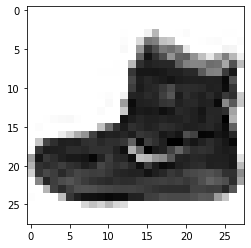

In [80]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

import numpy as np
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0].reshape(28,28), cmap='gray_r')
plt.show()

In [86]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 층을 추가하는 또 다른 방법 1
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])

ValueError: ignored

In [87]:
model = keras.Sequential([keras.layers.Dense(100, activation='sigmoid',input_shape=(784,), name='hidden'),
                          keras.layers.Dense(10, activation='softmax',name='output')]
            , name = '패션 MNIST 모델')
model.summary()
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [88]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

### 패션 MNIST 데이터는 28 x 28 크기이기 때문에 인공 신경망에 주입하기 위해 넘파이 배열의 reshape() 메서드를 사용해 1차원으로 펼쳐야 함
### Flatten 클래스는 배치 차원을 제외하고 나머지 입력 차원을 모두 일렬로 펼치는 역할

In [89]:
# 렐루 함수는 특히 이미지 처리에서 좋은 성능을 낸다고 알려져 있다

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs=5)


model.evaluate(val_scaled, val_target)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 54us/sample - loss: 0.5301 - acc: 0.8133
Epoch 2/5
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3940 - acc: 0.8584
Epoch 3/5
48000/48000 [==============================] - 3s 53us/sample - loss: 0.3565 - acc: 0.8706
Epoch 4/5
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3331 - acc: 0.8806
Epoch 5/5
48000/48000 [==============================] - 3s 52us/sample - loss: 0.3150 - acc: 0.8879


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.35333633160591127, 0.88075]

In [90]:
# 하이퍼파라미터는 모델이 학습하지 않아 사람이 지정해주어야 하는 파라미터
# 추가할 은닉층의 개수는 모델이 학습하는 것이 아니라 우리가 지정해 주어야 할 하이퍼 파라미터 

In [91]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD()
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.7757 - acc: 0.7480
Epoch 2/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.5369 - acc: 0.8170
Epoch 3/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.4871 - acc: 0.8327
Epoch 4/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.4590 - acc: 0.8421
Epoch 5/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.4406 - acc: 0.8475


In [92]:
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.4380527082681656, 0.8485]

In [93]:
# 학습률 기본값은 0.01
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.7898 - acc: 0.7436
Epoch 2/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.5353 - acc: 0.8180
Epoch 3/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.4864 - acc: 0.8334
Epoch 4/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.4595 - acc: 0.8415
Epoch 5/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.4408 - acc: 0.8483


## 옵티마이저, 하이퍼 파라미터, 함수에 따른 결과값은 달라진다 항상.

In [94]:
model.evaluate(val_scaled, val_target)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.44669715030988055, 0.8440833]

In [95]:
# 아다그라드
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 47us/sample - loss: 1.1523 - acc: 0.6553
Epoch 2/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.7701 - acc: 0.7522
Epoch 3/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.6865 - acc: 0.7777
Epoch 4/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.6413 - acc: 0.7912
Epoch 5/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.6113 - acc: 0.8001


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.615868150472641, 0.7978333]

In [96]:
# 아담
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_scaled, train_target, epochs=5)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 49us/sample - loss: 0.5266 - acc: 0.8170
Epoch 2/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3954 - acc: 0.8597
Epoch 3/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3536 - acc: 0.8724
Epoch 4/5
48000/48000 [==============================] - 2s 49us/sample - loss: 0.3288 - acc: 0.8805
Epoch 5/5
48000/48000 [==============================] - 2s 47us/sample - loss: 0.3089 - acc: 0.8876


## drop_out
# 드롭아웃은 딥러닝의 아버지로 불리는 제프리 힌턴이 소개
# 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 과대적합을 막음
# 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면 이 신경망은 더 안정적인 예측을 만들 수 있다는 것.

In [97]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [98]:
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


In [99]:
model.evaluate(val_scaled, val_target)

[0.4600295166571935, 0.87916666]

## 손실과 정확도 그래프

In [100]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) 

In [101]:
history.history.keys()

dict_keys(['loss', 'acc'])

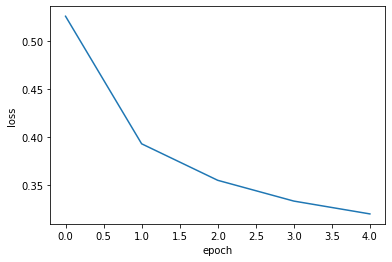

In [102]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

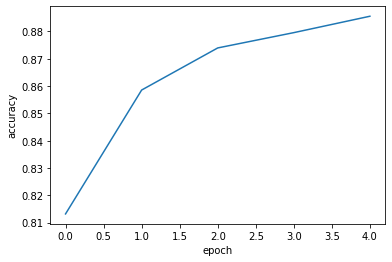

In [103]:
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 에포크에 따른 과대적합과 과소적합을 파악하려면 훈련 세트에 대한 점수 뿐만 아니라 검증 세트에 대한 점수도 필요

In [104]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


In [105]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

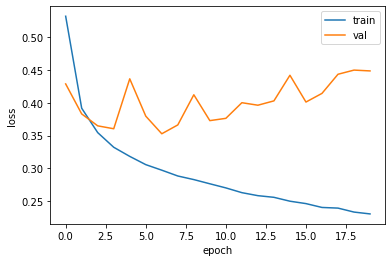

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [108]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


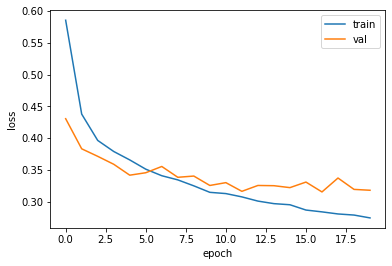

In [109]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

### EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 
### 훈련을 중지할 수 있음

In [110]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

In [111]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history= model.fit(train_scaled, train_target, epochs=20, verbose=0,
                  validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


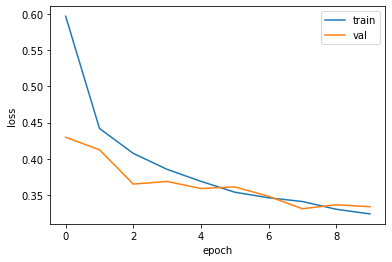

In [112]:
## ModelCheckpoint 콜백은 기본적으로 최상의 검증 점수를 만다는 모델을 저장

early_stopping_cb.stopped_epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [115]:
## 합성곱 신경망 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))   # 첫번째 합성곱

model.add(keras.layers.MaxPooling2D(2))  ## 풀링

model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
          padding='same'))                         # 두번째 합성곱
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_12 (Flatten)        (None, 3136)              0         
                                                                 
 dense_48 (Dense)            (None, 100)             

In [114]:
## 패션 MNIST 데이터
    
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [116]:
## 모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-cnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
47680/48000 [============================>.] - ETA: 0s - loss: 0.5120 - acc: 0.8164

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48000/48000 [==============================] - 11s 234us/sample - loss: 0.5113 - acc: 0.8167 - val_loss: 0.3448 - val_acc: 0.8729
Epoch 2/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.3438 - acc: 0.8760 - val_loss: 0.2776 - val_acc: 0.8966
Epoch 3/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2926 - acc: 0.8934 - val_loss: 0.2648 - val_acc: 0.8994
Epoch 4/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2628 - acc: 0.9041 - val_loss: 0.2403 - val_acc: 0.9102
Epoch 5/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2353 - acc: 0.9128 - val_loss: 0.2320 - val_acc: 0.9148
Epoch 6/20
48000/48000 [==============================] - 5s 98us/sample - loss: 0.2167 - acc: 0.9201 - val_loss: 0.2198 - val_acc: 0.9193
Epoch 7/20
48000/48000 [==============================] - 5s 97us/sample - loss: 0.2000 - acc: 0.9260 - val_loss: 0.2314 - val_acc: 0.9176
Epoch 8/20
48000/48000 [============